# 2.4: Fundamentals of Visualization Libraries Part 2

2. In a new notebook, import all necessary libraries and read your latest weather and bike data sets from the previous task.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [3]:
df = pd.read_csv('newyork_data.csv', index_col = 0)

/var/folders/wd/xh8m0hc916l1ffmsssspd3f40000gn/T/ipykernel_90771/3816047514.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('newyork_data.csv', index_col = 0)


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

In [4]:
# change datatypes for memory 
df['end_lat'] = df['end_lat'].astype('float32')
df['end_lng'] = df['end_lng'].astype('float32')
df['start_lat'] = df['start_lat'].astype('float32')
df['start_lng'] = df['start_lng'].astype('float32')
df['avgTemp'] = df['avgTemp'].astype('float32')

In [7]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [9]:
# drop _merge column from previous merge
df.drop(columns = {'_merge'}, inplace = True)

In [6]:
# check shape
df.shape

(30689921, 15)

3. Pick one theme and set it for all plots, and think of the style and the palette you want to use.

In [7]:
sns.set_theme(style = "dark", palette = "rocket_r")

4. Create a bar chart of the top 20 starting stations frequencies. Does the color palette you chose when you set the theme in the previous step make sense in this plot? If not, change the style of this specific plot temporarily. Hint: Does the default setting of the palette contain enough colors?

In [8]:
df['value'] = 1

In [9]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [10]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,22211
1,1 Ave & E 16 St,69320
2,1 Ave & E 18 St,72872
3,1 Ave & E 30 St,46688
4,1 Ave & E 39 St,54145
...,...,...
1750,Wyckoff Ave & Gates Ave,16931
1751,Wyckoff St & 3 Ave,255
1752,Wyckoff St & Nevins St,11753
1753,Wythe Ave & Metropolitan Ave,67866


In [11]:
top20 = df_t.nlargest(20, 'value')

In [12]:
top20

,start_station_name,value
1582,W 21 St & 6 Ave,131679
1712,West St & Chambers St,126290
494,Broadway & W 58 St,117797
286,6 Ave & W 33 St,109542
8,1 Ave & E 68 St,108412
460,Broadway & E 14 St,101115
484,Broadway & W 25 St,100784
1506,University Pl & E 14 St,100089
462,Broadway & E 21 St,97958
1598,W 31 St & 7 Ave,96157


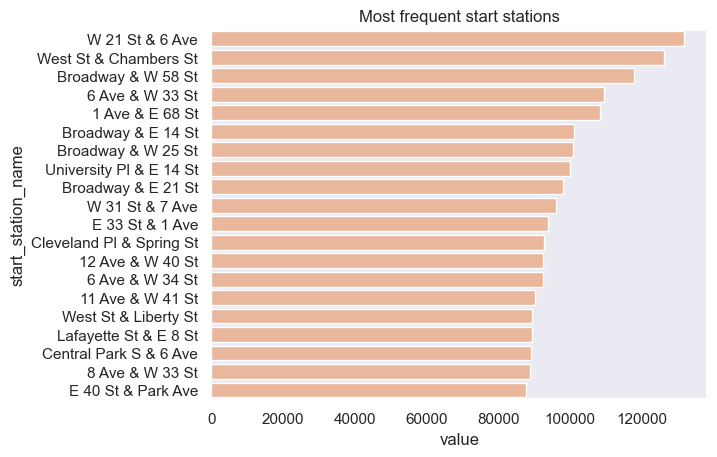

In [13]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

5. Recreate the dual-axis line plot from the previous Exercise using seaborn.

In [11]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [13]:
df_group.head()

,date,ride_id
0,2022-01-01,20895
1,2022-01-02,44234
2,2022-01-03,34126
3,2022-01-04,37879
4,2022-01-05,35080


In [15]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          30689921
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (0, 17)
Shape of January 2nd is (0, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', 'merge_flag'],
      dtype='object')


In [47]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,
2022-01-01,F2147CAB2E003A12,classic_bike,2022-01-01 00:56:36,2022-01-01 01:06:55,Cedar St & Evergreen Ave,4721.01,Willoughby Ave & Tompkins Ave,4665.02,40.696709,-73.928070,40.694256,-73.946266,member,11.6,1,20895,both
2022-01-01,27FF7FCE0F8A02DF,classic_bike,2022-01-01 15:42:26,2022-01-01 16:02:59,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013245,40.716022,-73.999741,casual,11.6,1,20895,both
2022-01-01,E413BC1D0B4C6031,classic_bike,2022-01-01 15:37:55,2022-01-01 16:03:05,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013245,40.716022,-73.999741,casual,11.6,1,20895,both
2022-01-01,1967ADD90811CE78,electric_bike,2022-01-01 17:35:23,2022-01-01 17:46:05,Cabrini Blvd & W 177 St,8358.1,Broadway & W 220 St,8715.01,40.848282,-73.941345,40.872414,-73.912804,member,11.6,1,20895,both
2022-01-01,D199C729356BA836,classic_bike,2022-01-01 19:25:20,2022-01-01 19:41:53,5 Ave & E 72 St,7100.07,W 41 St & 8 Ave,6602.03,40.772827,-73.966850,40.756405,-73.990028,casual,11.6,1,20895,both


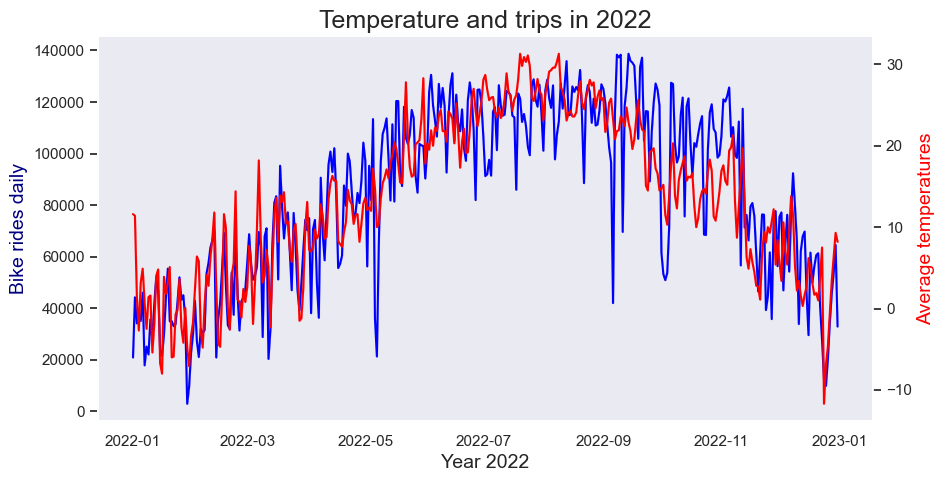

In [49]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

6. Make a box plot of one of the categorical variables in your data set. What does this plot tell you about the variable? Write down a 3 to 5-sentence analysis of the elements of the box plot.

While the box plots are very similar is shows that there are a larger amount of member rides daily than casual riders. Also on the casual riders side "mimimum" data point it higher that the member with more outlers and a slightly higher median. The box plots also show there are more riders member and casual below the median number of rides daily. 

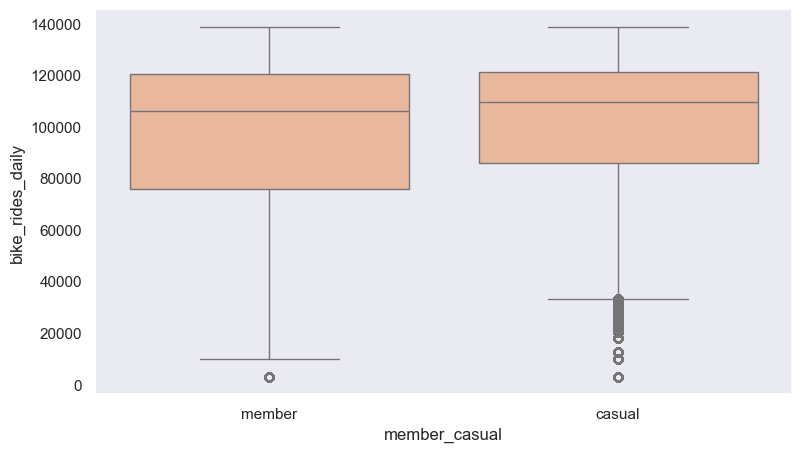

In [62]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'bike_rides_daily', data = df)
plt.show()

7. Think of how the FacetGrid plot would make sense to aid the analysis questions in the project. Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings.

With a FacetGrid we can see two variables side by side and see the relationsship and easily compare multiple variables. In this case we can see that between member and casual riders and average temperature the shape of the two graphs are almost identical and there are just more member riders. This graph seems to show that the likelihood of riding does not change based on temperature from member to casual rider. 

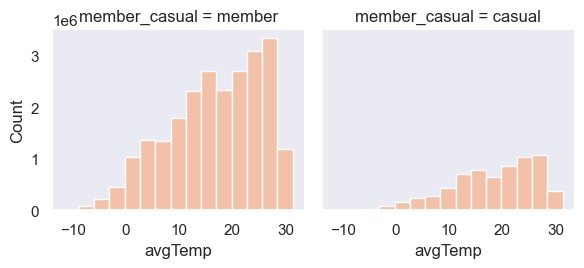

In [89]:
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "avgTemp", bins = 15)